  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=8153b1743f927b534fc128b008fe234c1fdbafb45ea7d09e9eff819ba65cf052
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
РЕЗУЛЬТАТИ МОДЕЛІ КОКСА:


<lifelines.CoxPHFitter: fitted with 15 total observations, 7 right-censored observations>
             duration col = 'time'
                event col = 'event'
                penalizer = 0.5
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 15
number of events observed = 8
   partial log-likelihood = -13.44
         time fit was run = 2025-10-22 12:49:35 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
avg_spend     -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
purchase_freq  0.48      1.62      0.29           -0.08            1.05                0.92                2.85
discount_use  -0.01      0.99      0.58           -1.15            1.13                0.32                3.10

               cmp to     z    p  -log2(p)
covariate                                 
avg_spend        0.00 -0.66 0.51      0.97
purchase_freq    0.00  1.68 0.09      3.44
discount_use     0.00 -0.01 0.99      0.01
---
Concordance = 0.96
Partial AIC = 32.88
log-likelihood ratio test = 4.30 on 3 df
-log2(p) of ll-ratio test = 2.11

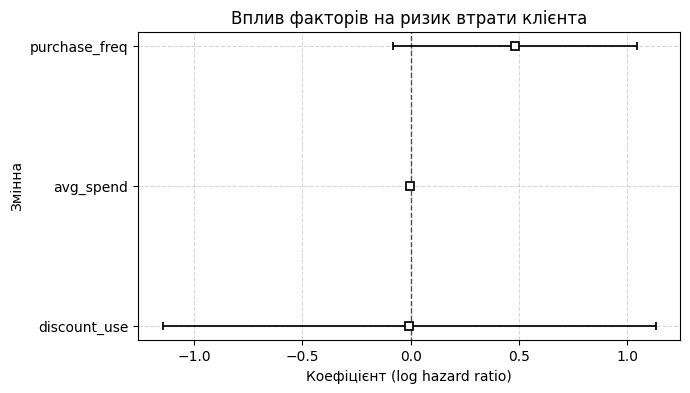

<Figure size 700x400 with 0 Axes>

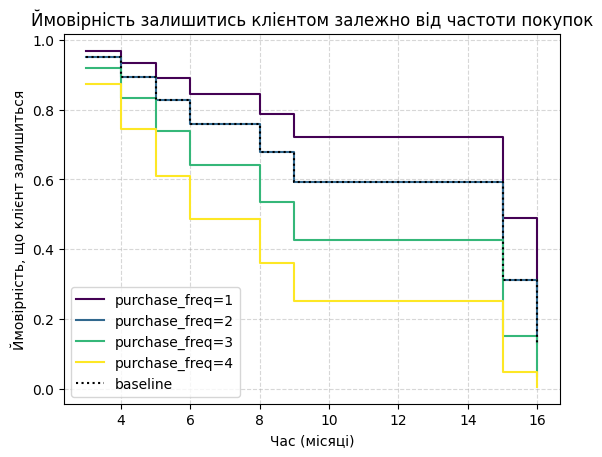

In [2]:
!pip install lifelines

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

data = pd.DataFrame({
    'time': [5, 12, 9, 15, 7, 3, 10, 14, 6, 8, 11, 16, 4, 9, 13],
    'status': [2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1],
    'avg_spend': [200, 400, 250, 600, 350, 150, 700, 300, 280, 320, 500, 220, 260, 480, 330],
    'purchase_freq': [3, 1, 2, 1, 2, 4, 1, 2, 3, 3, 1, 2, 4, 1, 3],
    'discount_use': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
})

data['event'] = data['status'].apply(lambda x: 1 if x == 2 else 0)
data = data.drop(columns=['status'])

data_reduced = data[['time', 'event', 'avg_spend', 'purchase_freq', 'discount_use']]

cph = CoxPHFitter(penalizer=0.5)
cph.fit(data_reduced, duration_col='time', event_col='event')

print("РЕЗУЛЬТАТИ МОДЕЛІ КОКСА:")
cph.print_summary()

plt.figure(figsize=(7, 4))
cph.plot()
plt.title("Вплив факторів на ризик втрати клієнта")
plt.xlabel("Коефіцієнт (log hazard ratio)")
plt.ylabel("Змінна")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(7, 4))
cph.plot_partial_effects_on_outcome(
    covariates=['purchase_freq'],
    values=[1, 2, 3, 4],
    cmap='viridis'
)
plt.title("Ймовірність залишитись клієнтом залежно від частоти покупок")
plt.xlabel("Час (місяці)")
plt.ylabel("Ймовірність, що клієнт залишиться")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()